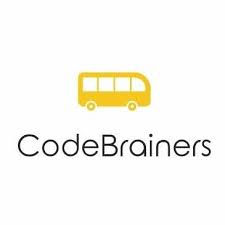

# Python Object-Oriented Programming (OOP)

_Mikołaj Leszczuk_

## Dziedziczenie (ang. *Inheritance*)

![](https://pythoncodeshark.files.wordpress.com/2014/01/inheritance-meem.jpg)

### Dziedziczenie

Dziedziczenie umożliwia tworzenie nowych klas, które przejmują (dziedziczą) formę i funkcjonalność klas bazowych. I tak jak dziedzic majątku może nim rozporządzać, np. doprowadzić do ruiny, tak klasy pochodne (dziedziczące) mogą rozszerzać i ulepszać funkcjonalność klas przodków.

Dziedziczenie definiowane jest za pomocą składni:

In [22]:
class KlasaBazowa:
    pass

class KlasaPochodna(KlasaBazowa):
    pass

Przykład (na razie bez rozszerzania klasy bazowej `KontoBankowe`):

In [23]:
class KontoBankowe:
    def __init__(self, nazwa, stan=0):
        self.nazwa = nazwa
        self.stan = stan

    def info(self):
        print("nazwa:", self.nazwa)
        print("stan:", self.stan)

    def wyplac(self, ilosc):
        self.stan -= ilosc

    def wplac(self, ilosc):
        self.stan += ilosc


class KontoDebetowe(KontoBankowe):
    pass

> ##### Zadanie 1
> Sprawdź czy cały interfejs klasy bazowej `KontoBankowe` znajduje się i działa w instancji klasy pochodnej `KontoDebetowe`.

Rozszerzenie zachowania klasy `KontoBankowe`:

In [24]:
class KontoDebetowe(KontoBankowe):
    def __init__(self, nazwa, stan=0, limit=0):
        KontoBankowe.__init__(self, nazwa, stan)
        self.limit = limit

    def wyplac(self, ilosc):
        """Jeżeli stan konta po operacji przekroczyłby limit, przerwij."""
        if (self.stan - ilosc) < (-self.limit):
            print("Brak srodkow na koncie")
        else:
            KontoBankowe.wyplac(self, ilosc)

#### Super

Aby wywołać metodę klasy bazowej, zamiast wpisywać długie wyrażenie `NazwaKlasyBazowej` można użyć metody `super()` zwracającej klasę rodzica. Jest to szczególnie przydatne jeśli zmienimy nazwę klasy bazowej, nie trzeba będzie wtedy wprowadzać zmian w klasach pochodnych. Przykład z kontem bankowym:

In [28]:
    # bylo:
    def __init__(self, nazwa, stan=0, limit=0):
        KontoBankowe.__init__(self, nazwa, stan)
        self.limit = limit

    # jest:
    def __init__(self, nazwa, stan=0, limit=0):
        super().__init__(nazwa, stan)
        self.limit = limit

#### Zadanie utrwalające

Stwórz klasę bazową dla figur geometrycznych:

In [1]:
import math


class Figura:
    def obwod(self):
        """Obliczanie obwodu."""
        raise NotImplementedError

    def pole(self):
        """Obliczanie pola powierzchni."""
        raise NotImplementedError

Następnie zaimplementuj klasy pochodne dla następujących figur:

1. koło
1. trójkąt równoboczny
1. prostokąt
1. kwadrat
1. równoległobok
1. trapez prostokątny

Pamiętaj o zachowaniu odpowiedniej hierarchii (dziedziczenia) oraz inicjalizacji atrybutów (np. wysokości, promienia czy długości boku) w metodzie `__init__`.

1. koło

In [2]:
class Kolo(Figura):
    def __init__(self, r):
        self.r = r

    def obwod(self):
        return 2 * math.pi * self.r

    def pole(self):
        return math.pi * self.r ** 2

In [3]:
f1 = Kolo(5)

In [4]:
f1.obwod()

31.41592653589793

In [5]:
f1.pole()

78.53981633974483

2. trójkąt równoboczny

In [6]:
class TrojkatRownoboczny(Figura):
    def __init__(self, a):
        self.a = a
        self.h = 0.5 * a * math.sqrt(3)

    def obwod(self):
        return 3 * self.a

    def pole(self):
        return 0.5 * self.a * self.h

In [7]:
f2 = TrojkatRownoboczny(5)

In [8]:
f2.obwod()

15

In [9]:
f2.pole()

10.825317547305481

3. prostokąt

In [10]:
class Prostokat(Figura):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def obwod(self):
        return 2 * (self.a + self.b)

    def pole(self):
        return self.a * self.b

In [11]:
f3 = Prostokat(2, 5)

In [12]:
f3.obwod()

14

In [13]:
f3.pole()

10

4. kwadrat

In [14]:
class Kwadrat(Prostokat):
    def __init__(self, a):
        self.a = a
        # trik, dzięki któremu możemy dziedziczyć wprost
        # z prostokąta i nie musimy wypełniać metod `obwod` i `pole`
        self.b = a

In [15]:
f4 = Kwadrat(5)

In [16]:
f4.obwod()

20

In [17]:
f4.pole()

25

5. równoległobok

In [18]:
class Rownoleglobok(Figura):
    def __init__(self, a, b, h):
        # inny sposób przypisywania zmiennych
        # trochę skraca ilość linii
        self.a, self.b, self.h = a, b, h

    def obwod(self):
        return 2 * (self.a + self.b)

    def pole(self):
        return 0.5 * self.a * self.h

In [19]:
f5 = Rownoleglobok(2, 4, 3)

In [20]:
f5.obwod()

12

In [21]:
f5.pole()

3.0

6. trapez prostokątny

In [44]:
class TrapezProstokatny(Figura):
    def __init__(self, a, b, h):
        self.a, self.b, self.h = a, b, h

        # czwarty bok (self.c) obliczamy z Pitagorasa
        d = b - a
        self.c = (h ** 2 + d ** 2) ** 0.5

    def obwod(self):
        return sum([self.a, self.b, self.c, self.h])

    def pole(self):
        return 0.5 * (self.a + self.b) * self.h

In [51]:
f6 = TrapezProstokatny(2, 4, 3)

In [52]:
f6.obwod()

12.60555127546399

In [53]:
f6.pole()

9.0

#### Wielokrotne dziedziczenie

Trochę jak w prawdziwym życiu w rodzinie, klasa pochodna może mieć więcej niż jednego przodka i od każdego przodka zbierać atrybuty i metody.

![](https://img.devrant.com/devrant/rant/r_403541_YuG5k.jpg)

Przykład klasy z dwoma rodzicami:

In [54]:
class A:
    """Rodzic pierwszy"""

    def __init__(self):
        super().__init__()
        self.a = "A"

    def fa(self):
        print("a:", self.a)


class B:
    """Rodzic drugi"""

    def __init__(self):
        super().__init__()
        self.b = "B"

    def fb(self):
        print("b:", self.b)


class Pochodna(B, A):
    """Dziecko"""

    def __init__(self):
        super().__init__()

Działanie:

In [55]:
d = Pochodna()

In [56]:
d.a

'A'

In [57]:
d.b

'B'

In [58]:
d.fa()

a: A


In [59]:
d.fb()

b: B


Jak widać klasa `Pochodna` zawiera pola i metody od każdego z rodziców.

> ##### Zadanie 3
> W klasach `A` i `B` zmień nazwy metod `fa()` i `fb()` na `f()`. Sprawdź jak zachowa się teraz wywołanie `d.f()`, gdzie `d` jest instancją klasy pochodnej.\
> Jak na to zachowanie wpływa zmiana kolejności rodziców przy definicji klasy pochodnej `class Pochodna(tutaj_kolejnosc)`?

### Ćwiczenia

> ##### Ćwiczenie: Utwórz podrzędną klasę `Bus`, która odziedziczy wszystkie zmienne i metody klasy `Vehicle`
> Utwórz obiekt `Bus`, który odziedziczy wszystkie zmienne i metody klasy `Vehicle` i wyświetli je.\
> Dane wejściowe:

In [60]:
class Vehicle:

    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

> Oczekiwany wynik:\
> `Nazwa pojazdu: Szkolne Volvo Prędkość: 180 Przebieg: 12`

In [61]:
class Vehicle:

    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

class Bus(Vehicle):
    pass

In [62]:
School_bus = Bus("Szkolne Volvo", 180, 12)

In [63]:
print("Nazwa pojazdu:", School_bus.name, "Prędkość:", School_bus.max_speed, "Przebieg:", School_bus.mileage)

Nazwa pojazdu: Szkolne Volvo Prędkość: 180 Przebieg: 12


> ##### Ćwiczenie: Dziedziczenie klas
> Utwórz klasę `Bus`, która dziedziczy po klasie `Vehicle`. Podaj argument pojemności w metodzie `Bus.seating_capacity()` o domyślnej wartości `50`.\
> Dane wejściowe:
> Użyj poniższego kodu dla swojej nadrzędnej klasy `Vehicle`. Musisz użyć przesłaniania metody.

In [71]:
class Vehicle:
    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

    def seating_capacity(self, capacity):
        return f"Liczba miejsc siedzących w {self.name} to {capacity} pasażerów"

> Oczekiwany wynik:\
> `Liczba miejsc siedzących w Szkolne Volvo to 50 pasażerów`

In [80]:
class Vehicle:
    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

    def seating_capacity(self, capacity):
        return f"Liczba miejsc siedzących w {self.name} to {capacity} pasażerów"

class Bus(Vehicle):
    def seating_capacity(self, capacity=50):
        return super().seating_capacity(capacity)

In [81]:
School_bus = Bus("Szkolne Volvo", 180, 12)

In [82]:
print(School_bus.seating_capacity())

Liczba miejsc siedzących w Szkolne Volvo to 50 pasażerów
